<a href="https://colab.research.google.com/github/KharismadinaHM/Darth-urany/blob/master/M3_EDA_Komputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nama : KHARISMADINA HIJRA M
### NPM  : 13119305
### KELAS: 3KA01

### Overview Dataset

"Data Sensus Penghasilan". Data ini diambil dari database biro Sensus 1994 oleh Ronny Kohavi dan Barry Becker (Data Mining and Visualization, Silicon Graphics).

Data set ini berisikan beberapa kategori sebagai berikut
* age
* sex
* race
* education
* marital-status
* workclass
* occupation
* relationship
* native-country
* hours-per-week
* capital-loss
* capital-gain
* fnlwgt

# Exploratory Data Analysis (EDA)

Pada praktikum ini, Anda akan melihat beberapa contoh Exploratory Data Analysis (EDA) pada data set sensus penghasilan. 

* [Pengambilan Data](#1)
* [Univariate analysis](#2)
* [Bivariate analysis](#3)

# Instruksi Tugas Praktikum FIKTI dan FTI

1. Buat dan jelaskan univariate analysis untuk kategori hours-per-week dan income
2. Buat dan jelaskan Bivariate analysis untuk hubungan antara hours-per-week dan income


<a id="1"></a>

# 1. Pengambilan Data:

## 1.1 Import packages

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

## 1.2 Import data

In [3]:
data = pd.read_csv("https://gitlab.com/andreass.bayu/file-directory/-/raw/main/adult.csv")
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


# 2. EDA

## 2.1.Univariate analysis
<a id="2"></a>

## 2.1.1 Age

### **i.	Distribusi**

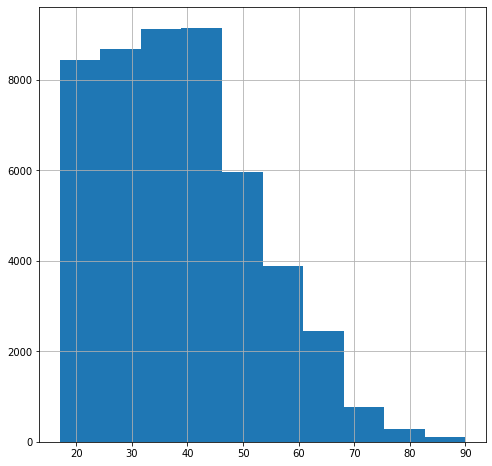

In [4]:
data['age'].hist(figsize=(8,8))
plt.show()

In [5]:
data[data["age"]>70].shape

(868, 15)

### **ii.	Deskripsi**
Histogram di atas menjelaskan bahwa :
*  atribut "usia" tidak simetris.
*  miring ke kanan (Tapi ini baik karena orang dewasa yang lebih muda mendapatkan upah bukan yang lebih tua)
*  Usia minimum dan maksimum orang adalah 17 dan 90 tahun.
*  Dataset ini memiliki lebih sedikit pengamatan (868) tentang usia orang setelah usia tertentu, yaitu 70 tahun.

## 2.1.2 Income

### **i. Distribusi**

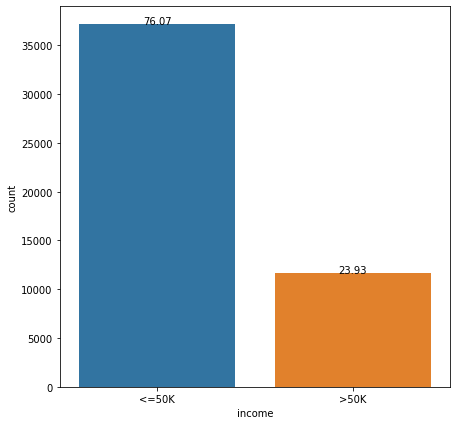

In [6]:
plt.figure(figsize=(7,7))
total = float(len(data) )

ax = sns.countplot(x="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### **ii. Deskripsi**
Distribusi di atas menjelaskan bahwa :
* **Dataset ini tidak seimbang, yaitu 23,93% di antaranya termasuk dalam kelompok pendapatan 1 (yang berpenghasilan lebih dari \\$50K) dan 76% termasuk dalam kelompok pendapatan 0 (yang berpenghasilan kurang dari \\$50K).**

<a id="3"></a>
# 2.2.Bivariate analysis

## 2.2.1 Age - income (Hubungan)

### i. **Boxplot**

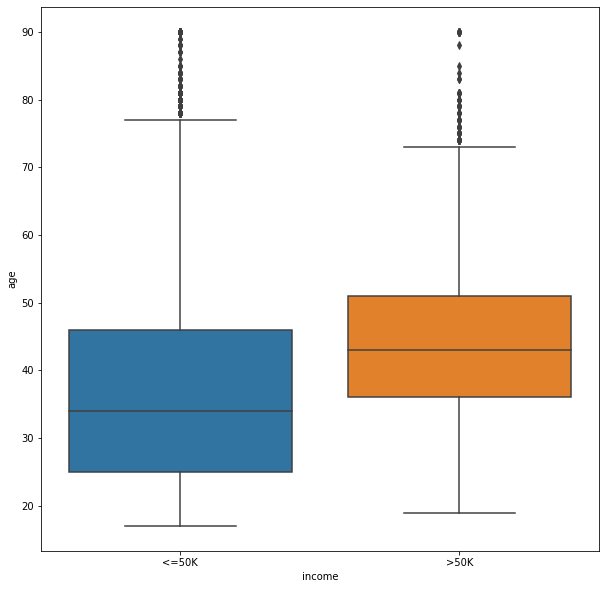

In [7]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=data)
plt.show()

In [8]:
data[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,>50K,44.275178
0,<=50K,36.872184


### ii. Deskripsi
Bivariate boxplot di atas menjelaskan bahwa :
* Rata-rata "usia" untuk kelompok Penghasilan (<= \\$50K) adalah 36,8 tahun. Dan untuk kelompok Penghasilan (> \\$50K) adalah 44,2 tahun
* Kelompok pendapatan(<=50K) memiliki median "usia"(34 tahun) lebih rendah daripada kelompok Pendapatan(>50K) yang memiliki median "usia"(42 tahun).

### iii. Uji Hipotesis (untuk menguji hubungan antara Age & Income )
**Two sampled T-test** :-Uji Independent Samples t Test atau 2-sample t-test membandingkan rata-rata dua kelompok independen untuk menentukan apakah ada bukti statistik bahwa rata-rata populasi terkait berbeda secara signifikan.


Contoh : apakah ada hubungan antara usia dan pendapatan?

Tentukan null dan alternate hypothesis.

    Secara umum, null hypothesis akan menyatakan bahwa kedua populasi yang diuji tidak memiliki perbedaan yang signifikan secara statistik.
    alternate hypothesis akan menyatakan bahwa ada perbedaan.

Dalam contoh ini kita dapat mengatakan bahwa:
*  Null Hypothesis :- tidak ada perbedaan Rerata usia kelompok pendapatan >50k dan kelompok pendapatan <=50k.
*  Alternate Hypothesis :- ada perbedaan Rerata usia kelompok pendapatan >50k dan kelompok pendapatan <=50k.

In [9]:
import random

data = data[(np.abs(stats.zscore(data["age"])) < 3)] 

income_1 = data[data['income']=='<=50K']['age']
income_0 = data[data['income']=='>50K']['age']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)


In [10]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("null hypothesis ditolak")
else:
    print("null hypothesis diterima")

ttest -4.714696275932005
p value 4.730382675535507e-06
null hypothesis ditolak


### iv. Kesimpulan akhir

Menggunakan analisis statistik,

    Dapat disimpulkan bahwa terdapat perbedaan yang signifikan pada rerata usia kelompok berpenghasilan >50K dan kelompok berpenghasilan <=50K.
    Hal Ini membuktikan bahwa usia memiliki peranan dalam membedakan kelompok pendapatan.

# Tugas

## 1. Univariate analysis

## 1.1 hours-per-week

### **i.	Distribusi**

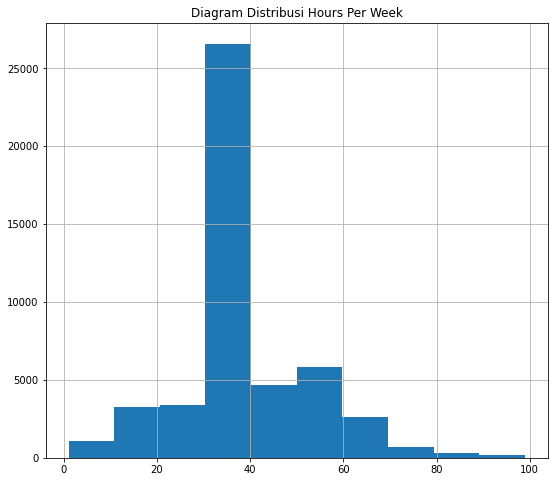

In [11]:
# Buat diagram hours-per-week
data['hours-per-week'].hist(figsize=(9,8))
plt.title("Diagram Distribusi Hours Per Week")
plt.show()


In [12]:
data[data["hours-per-week"]==40].shape

(22761, 15)

In [13]:
data[data["hours-per-week"]>=80].shape

(526, 15)

### **ii. Deskripsi**




In [ ]:
# Jelaskan hasil diagram tersebut
1. Pada Diagram tersebut 40 hours per week merupakan data tertinggi sebanyak 22671 orang
2. Lebih dari 80 hours per week merupakan data terendah sebanyak 526 orang
3. Indikator dari 0 - 100 hours per weeks

## 1.2 Income

### **i.	Distribusi**

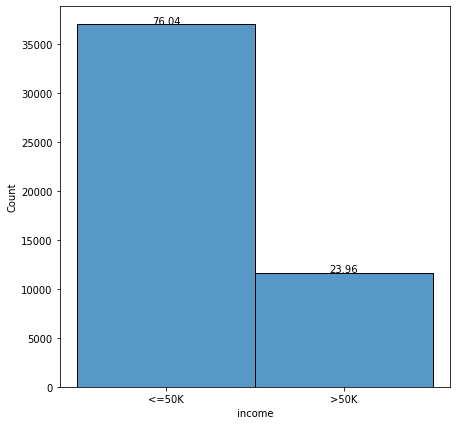

In [21]:
# Buat diagram income
plt.figure(figsize=(7,7))
total = float(len(data) )

ax = sns.histplot(x="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### **ii. Deskripsi**

In [ ]:
# Jelaskan hasil diagram tersebut

sebanyak 76.04 % income data dibawah <=50 K dan kelompok pendapatan 1 sebesar 23.96 % dimana diagram tidak seimbang.

# 2. Bivariate analysis

## 2.1 hours-per-week - income (Hubungan)

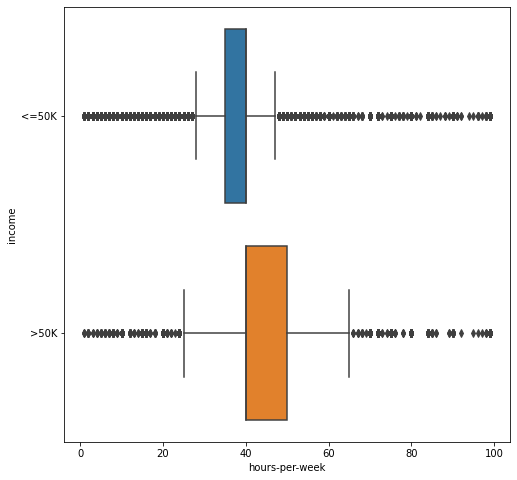

In [23]:
# Buat diagram, hubungan hours-per-week dengan income
fig = plt.figure(figsize=(8,8))
sns.boxplot(x="hours-per-week", y="income", data=data)
plt.show()

In [24]:
data[['hours-per-week','income']].groupby(['income'], as_index=False).mean().sort_values(by='hours-per-week', ascending=False)

,income,hours-per-week
1,>50K,45.468863
0,<=50K,38.892967


### ii. Deskripsi

   

In [ ]:
# jelaskan hasil diagram tersebut
Pada diagram perhubungan diatas ialah membandingkan hours per week dan income , 
jika dilihat pada kelompok 1 gaji / income diatas 50K mempunyai jam kerja 45.4 hours per week nya
ini dibandingkan dengan kelompok 0 gaji / income dibawah atau sama dengan 50K mempunyai jam kerja 38 hours per week
lebih rendah 7 jam.

### iii. Uji Hipotesis (untuk menguji hubungan antara hours-per-week & Income )
Dalam contoh ini kita dapat mengatakan bahwa:

    Null Hypothesis :- tidak ada perbedaan Rerata kelompok pendapatan >50k dan kelompok pendapatan <=50k.
    Alternate Hypothesis :- ada perbedaan Rerata kelompok pendapatan >50k dan kelompok pendapatan <=50k.

In [27]:
# Buat uji hipotesis untuk menentukan null atau alternate hypothesis
import random
from scipy.stats import ttest_ind

data = data[(np.abs(stats.zscore(data["age"]))< 3)]

income_1 = data[data['income']=='<=50K']['hours-per-week']
income_0 = data[data['income']=='>50K']['hours-per-week']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var= False)
print("ttest", ttest)
print('p value', pval)

if pval < 0.05:
  print("null Hypothesis ditolak!!!")
else:
  print("null Hypothesis diterima")



ttest -2.6122461354870015
p value 0.009692903302243233
null Hypothesis ditolak!!!


### iv. Kesimpulan akhir


In [ ]:
# Berikan kesimpulan

Kesimpulannya ialah ada perbedaan antara kelompok income > 50K dengan kelompok <= 50 K.
Karena Jika memiliki income lebih tinggi maka beban pekerjaan akan semakin bertambah dan waktu kerja juga menjadi bertambah.
begitu juga dengan penghasilan yang rendah. 